### 1.) Gestión de datos (combinar y unir)

Las operaciones de *merge* o *join* combinan conjuntos de datos al vincular filas usando una o más claves. Estas operaciones son fundamentales para las bases de datos relacionales (por ejemplo, basadas en SQL). La función *merge* en pandas es el principal punto de entrada para usar estos algoritmos en sus datos.

In [1]:
import pandas as pd
import numpy as np

**merge**

In [2]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"], "data1": range(7)})
df2 = pd.DataFrame({"key": ["a", "b", "d"], "data2": range(3)})

df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [3]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


Este es un ejemplo de una unión de many-to-one (muchos a uno); los datos en df1 tienen múltiples filas etiquetadas como
a y b, mientras que df2 tiene solo una fila para cada valor en la columna clave. La función *merge* arroja:

In [5]:
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


Si los nombres de las columnas son diferentes en cada objeto, puede especificarlos por separado:

In [6]:
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],"data1": range(7)})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"],"data2": range(3)})

df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [7]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [9]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey")

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


Puede notar que los valores "c" y "d" y los datos asociados faltan en el resultado. Por defecto, merge hace una unión "interna"; las claves en el resultado son la intersección, o el conjunto común que se encuentra en ambas tablas. Otras opciones posibles son "izquierda", "derecha" y "exterior". La unión exterior toma la unión de las llaves, combinando las
efecto de aplicar combinaciones izquierda y derecha:

In [10]:
pd.merge(df1, df2, how="outer")

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [11]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"], "data1": range(6)})
df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"], "data2": range(5)})

df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [12]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [14]:
pd.merge(df1, df2, on="key", how="right")

,data1,key,data2
0,0.0,b,1
1,1.0,b,1
2,5.0,b,1
3,0.0,b,3
4,1.0,b,3
5,5.0,b,3
6,2.0,a,0
7,4.0,a,0
8,2.0,a,2
9,4.0,a,2


In [15]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


Como eran tres filas "b" en el DataFrame izquierdo y dos en el derecho, hay seis filas "b" en el resultado. El método de combinación solo afecta a los distintos valores clave que aparecen en el resultado:

In [16]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


Para fusionar con varias claves, pase una lista de nombres de columna:

In [17]:
left = pd.DataFrame({"key1": ["foo", "foo", "bar"],"key2": ["one", "two", "one"],"lval": [1, 2, 3]})
right = pd.DataFrame({"key1": ["foo", "foo", "bar", "bar"],"key2": ["one", "one", "one", "two"],"rval": [4, 5, 6, 7]})

left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [18]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [19]:
pd.merge(left, right, on=["key1","key2"], how="outer")

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [20]:
pd.merge(left, right, on = "key1")

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [21]:
pd.merge(left, right, on="key1", suffixes=("_left", "_right"))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


El merge también se puede realizar por índice y no por nombre de columna (como se ha visto hasta el momento)

In [23]:
left1 = pd.DataFrame({"key": ["a", "b", "a", "a", "b", "c"], "value": range(6)})
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])

left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [24]:
right1

,group_val
a,3.5
b,7.0


In [25]:
pd.merge(left1, right1, left_on="key", right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [26]:
pd.merge(left1, right1, left_on="key", right_index=True, how ="outer")

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


**concat**

Otro tipo de operación de combinación de datos se conoce indistintamente como concatenaciónn, encuadernación o apilamiento. La función concatenar de NumPy puede hacer esto con  matrices:

In [27]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [30]:
s1 = pd.Series([0, 1], index=["a", "b"])
s2 = pd.Series([2, 3, 4], index=["c", "d", "e"])
s3 = pd.Series([5, 6], index=["f", "g"])

pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [33]:
pd.concat([s1, s2, s3], axis = 1, sort = False)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [34]:
pd.concat([s1, s2, s3], axis = 1, join = "inner")

,0,1,2


In [35]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=["b", "d", "a"])

df1

,a,b,c,d
0,0.688478,-0.069471,1.155695,-1.370582
1,-0.771308,0.090624,0.995256,1.616344
2,0.672287,0.424412,-1.002429,-0.234043


In [36]:
df2

,b,d,a
0,0.040768,2.211538,1.727458
1,-0.137429,-0.095823,-0.689131


In [39]:
pd.concat([df1, df2], sort=False, ignore_index=True)

,a,b,c,d
0,0.688478,-0.069471,1.155695,-1.370582
1,-0.771308,0.090624,0.995256,1.616344
2,0.672287,0.424412,-1.002429,-0.234043
3,1.727458,0.040768,NaN,2.211538
4,-0.689131,-0.137429,NaN,-0.095823


Combinar datos con superposición. Hay otra situación de combinación de datos que no se puede expresar como una combinación
o operación de concatenación. Puede tener dos conjuntos de datos cuyos índices se superponen por completo o en parte. Como ejemplo motivador, considere la función where de NumPy, que realiza el equivalente orientado a matrices de una expresión if-else:

In [40]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=["f", "e", "d", "c", "b", "a"])
b = pd.Series(np.arange(len(a), dtype=np.float64), index=["f", "e", "d", "c", "b", "a"])
b[-1] = np.nan

a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [41]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [42]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [43]:
a.combine_first(b)

f    0.0
e    2.5
d    2.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [44]:
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan], "b": [np.nan, 2., np.nan, 6.], "c": range(2, 18, 4)})
df2 = pd.DataFrame({"a": [5., 4., np.nan, 3., 7.], "b": [np.nan, 3., 4., 6., 8.]})

df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [45]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [46]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


### 2.) Reformar y pivotar

Hay una serie de operaciones básicas para reorganizar datos tabulares. Estas son conocidas como operaciones de cambio de forma o de pivote. 
    
- **stack:** 
This “rotates” or pivots from the columns in the data to the rows
- **unstack:**
This pivots from the rows into the columns

In [47]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)), index=pd.Index(["Ohio", "Colorado"], name="state"), 
                    columns=pd.Index(["one", "two", "three"], name="number"))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [54]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [49]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [55]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


Cambio de formato "largo" a "ancho"

Una forma común de almacenar múltiples series de tiempo en bases de datos y CSV es en los llamados largos o formato apilado. Carguemos algunos datos de ejemplo y hagamos una pequeña cantidad de series de tiempo disputas y otra limpieza de datos:

In [56]:
data = pd.read_csv("https://raw.githubusercontent.com/BrambleXu/pydata-notebook/master/examples/macrodata.csv")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [58]:
data.dtypes

year        float64
quarter     float64
realgdp     float64
realcons    float64
realinv     float64
realgovt    float64
realdpi     float64
cpi         float64
m1          float64
tbilrate    float64
unemp       float64
pop         float64
infl        float64
realint     float64
dtype: object

In [59]:
periods = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], name="date")
columns = pd.Index(["realgdp", "infl", "unemp"], name="item")

periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name=u'date', length=203, freq='Q-DEC')

In [67]:
data = data.reindex(columns=columns) 
data.index = periods.to_timestamp("D")

ldata = data.stack().reset_index().rename(columns={0: "value"})

In [70]:
data[:5]

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [71]:
ldata[:5]

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340


Este es el llamado formato largo para múltiples series de tiempo u otros datos de observación. con dos o más claves (aquí, nuestras claves son date e item). Cada fila de la tabla representa envía una única observación.

Los datos se almacenan con frecuencia de esta manera en bases de datos relacionales como MySQL, ya que un esquema fijo (nombres de columna y tipos de datos) permite que la cantidad de valores distintos en la columna del elemento cambie a medida que se agregan datos a la tabla. En el ejemplo anterior, la fecha y el elemento suelen ser las claves principales (en el lenguaje de la base de datos relacional), lo que ofrece integridad relacional y uniones más sencillas. En algunos casos, puede ser más difícil trabajar con los datos en este formato; es posible que prefiera tener un DataFrame que contenga una columna por valor de elemento distinto indexado por marcas de tiempo en la columna de fecha. 

El método de pivote de Frame realiza exactamente esta transformación:

In [73]:
ldata.head()

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340


In [72]:
pivoted = ldata.pivot("date", "item", "value")
pivoted

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2
1960-04-01,0.14,2834.390,5.2
1960-07-01,2.70,2839.022,5.6
1960-10-01,1.21,2802.616,6.3
1961-01-01,-0.40,2819.264,6.8


Suponga que tiene dos columnas de valor que desea remodelar simultáneamente:

In [74]:
ldata["value2"] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-01-01,realgdp,2710.349,0.485382
1,1959-01-01,infl,0.000,1.068654
2,1959-01-01,unemp,5.800,0.801719
3,1959-04-01,realgdp,2778.801,-0.572065
4,1959-04-01,infl,2.340,1.028957
5,1959-04-01,unemp,5.100,-0.550930
6,1959-07-01,realgdp,2775.488,-1.245779
7,1959-07-01,infl,2.740,1.497237
8,1959-07-01,unemp,5.300,-1.104286
9,1959-10-01,realgdp,2785.204,0.329044


In [76]:
pivoted = ldata.pivot("date", "item")
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  1.068654  0.485382  0.801719
1959-04-01  2.34  2778.801   5.1  1.028957 -0.572065 -0.550930
1959-07-01  2.74  2775.488   5.3  1.497237 -1.245779 -1.104286
1959-10-01  0.27  2785.204   5.6 -0.496625  0.329044 -0.423278
1960-01-01  2.31  2847.699   5.2  1.087703 -2.417246  1.040648

In [77]:
pivoted["value"][:5]

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [79]:
unstacked = ldata.set_index(["date", "item"]).unstack("item")
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  1.068654  0.485382  0.801719
1959-04-01  2.34  2778.801   5.1  1.028957 -0.572065 -0.550930
1959-07-01  2.74  2775.488   5.3  1.497237 -1.245779 -1.104286
1959-10-01  0.27  2785.204   5.6 -0.496625  0.329044 -0.423278
1960-01-01  2.31  2847.699   5.2  1.087703 -2.417246  1.040648
1960-04-01  0.14  2834.390   5.2 -0.721758  1.226031 -0.341333
1960-07-01  2.70  2839.022   5.6 -0.650551  1.352719  1.354374

##### Pivoting “Wide” to “Long” Format

In [12]:
df = pd.DataFrame({"key": ["foo", "bar", "baz"], "A": [1, 2, 3], "B": [4, 5, 6], "C": [7, 8, 9]})
df

,A,B,C,key
0,1,4,7,foo
1,2,5,8,bar
2,3,6,9,baz


La columna "clave" puede ser un indicador de grupo, y las otras columnas son valores de datos. Al usar pandas.melt, debemos indicar qué columnas (si las hay) son indicativas de grupo. Usemos "clave" como el único indicador de grupo aquí:

In [7]:
melted = pd.melt(df, ["key"])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [8]:
reshaped = melted.pivot("key", "variable", "value")
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [9]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [10]:
pd.melt(df, id_vars=["key"], value_vars=["A","B"])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [14]:
pd.melt(df, value_vars=["A","B","C"])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


### 3.) Visualización

Para todos los temas relacionados a visualización, la librería principal va a ser matplotlib. Por suerte, cuenta con una documentación extensa que puede ser consultada [AQUÍ](https://matplotlib.org/).

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


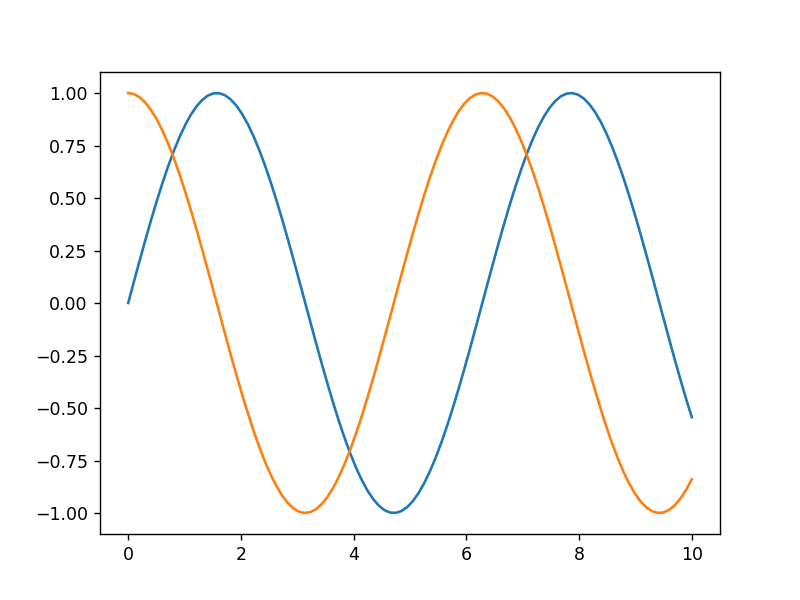

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

Una cosa a tener en cuenta: el comando plt.show() debe usarse solo una vez por sesión de Python, y se ve con mayor frecuencia al final del script. Múltiples comandos show() pueden conducir a un comportamiento impredecible dependiente del backend y, en su mayoría, deben evitarse.

<IPython.core.display.Javascript object>


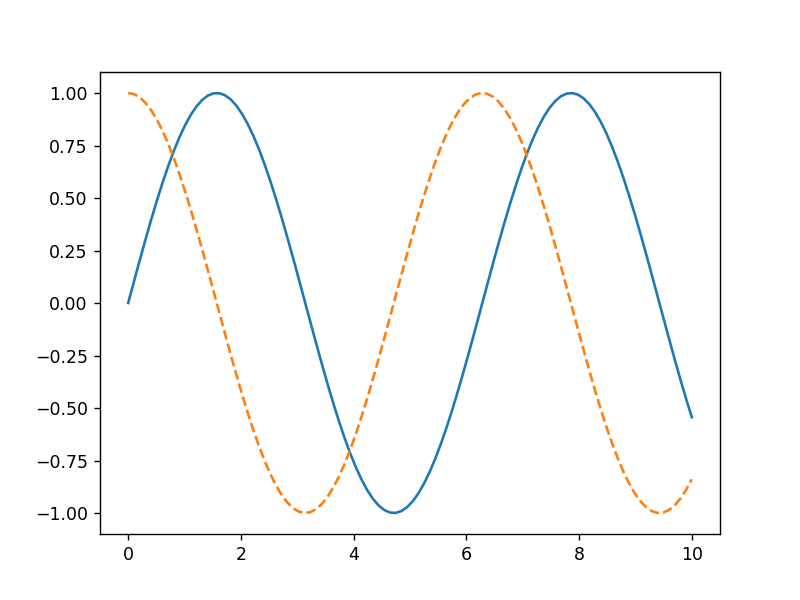

In [19]:
fig = plt.figure()

plt.plot(x, np.sin(x), "-")
plt.plot(x, np.cos(x), "--");

In [20]:
fig.savefig("my_figure.png")

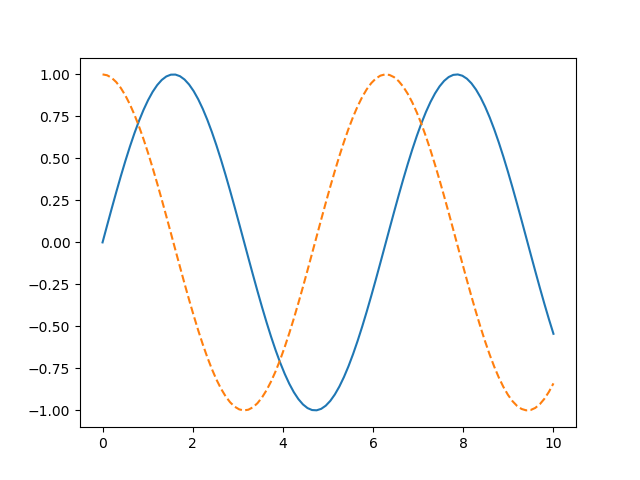

In [22]:
from IPython.display import Image
Image("my_figure.png")

In [23]:
fig.canvas.get_supported_filetypes()

{u'eps': u'Encapsulated Postscript',
 u'jpeg': u'Joint Photographic Experts Group',
 u'jpg': u'Joint Photographic Experts Group',
 u'pdf': u'Portable Document Format',
 u'pgf': u'PGF code for LaTeX',
 u'png': u'Portable Network Graphics',
 u'ps': u'Postscript',
 u'raw': u'Raw RGBA bitmap',
 u'rgba': u'Raw RGBA bitmap',
 u'svg': u'Scalable Vector Graphics',
 u'svgz': u'Scalable Vector Graphics',
 u'tif': u'Tagged Image File Format',
 u'tiff': u'Tagged Image File Format'}

Los gráficos en matplotlib residen dentro de un objeto Figure. Puedes crear una nueva figura con plt.figure:

<IPython.core.display.Javascript object>


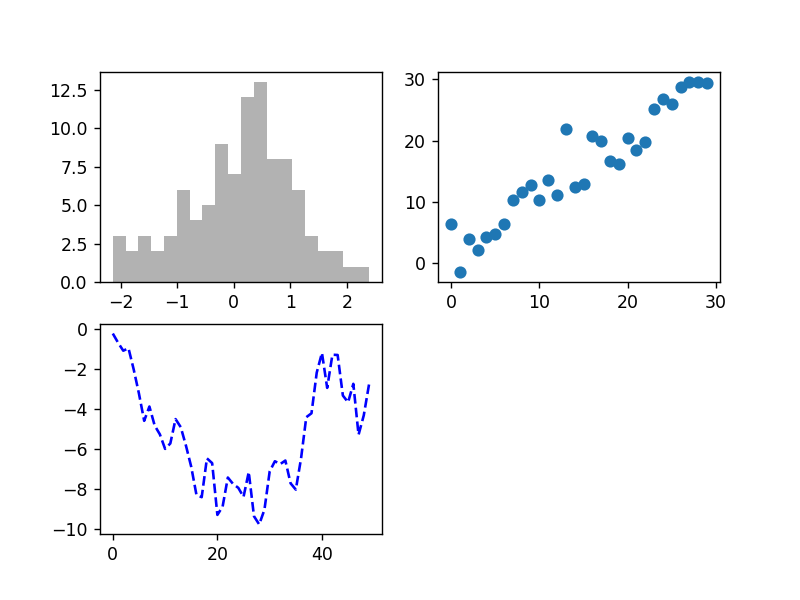

In [47]:
fig = plt.figure()

In [48]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

In [49]:
ax3 = fig.add_subplot(2, 2, 3)

In [50]:
plt.plot(np.random.randn(50).cumsum(), "b--");

Cuando ejecuta un comando de trazado como plt.plot([1.5, 3.5, -2, 1.6]), matplotlib se basa en la última figura y la subtrama utilizada (creando una si es necesario)

In [51]:
hist = ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)

In [52]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

Otra forma posible de crear subplots es: 

<IPython.core.display.Javascript object>


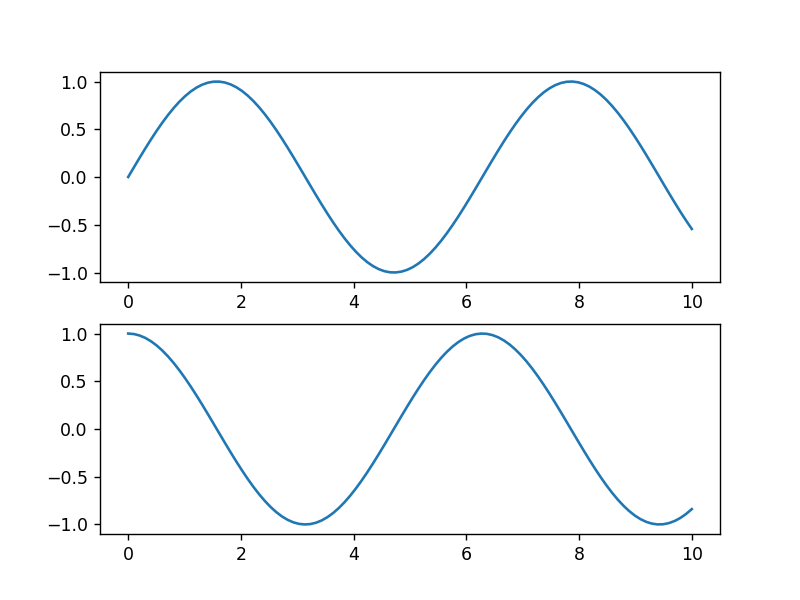

In [53]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

La interfaz orientada a objetos está disponible para estas situaciones más complicadas y para cuando quieras tener más control sobre tu figura. En lugar de depender de alguna noción de una figura o ejes "activos", en la interfaz orientada a objetos, las funciones de trazado son métodos de objetos explícitos de Figura y Ejes. Para volver a crear el gráfico anterior utilizando este estilo de trazado, puede hacer lo siguiente

<IPython.core.display.Javascript object>


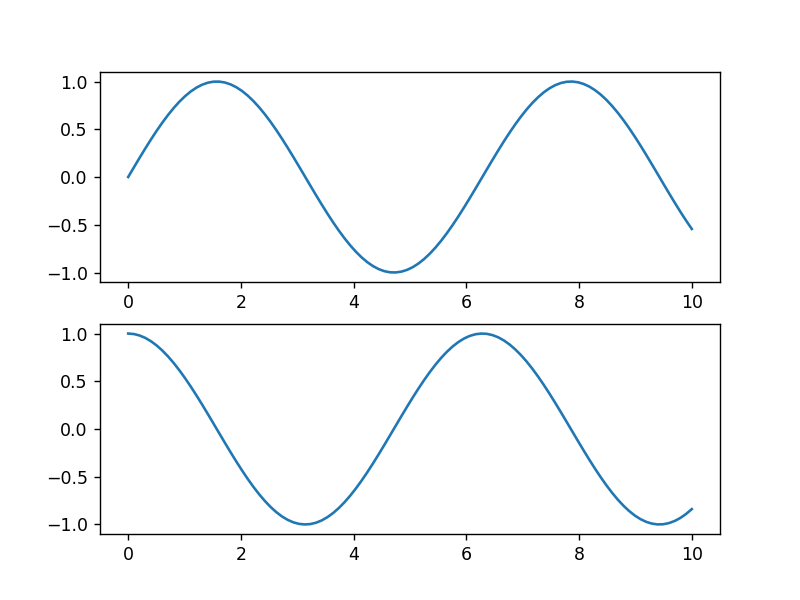

In [54]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Establecer colores

In [55]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

<IPython.core.display.Javascript object>


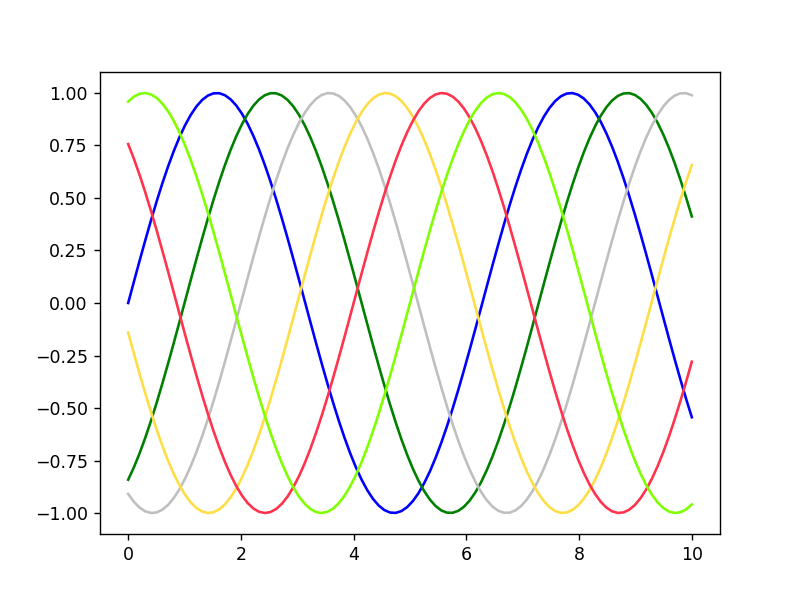

In [56]:
plt.figure()

plt.plot(x, np.sin(x - 0), color="blue") 
plt.plot(x, np.sin(x - 1), color="g")
plt.plot(x, np.sin(x - 2), color="0.75")
plt.plot(x, np.sin(x - 3), color="#FFDD44")
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3))
plt.plot(x, np.sin(x - 5), color="chartreuse");

Establecer estilo

In [60]:
plt.figure()

# plt.plot(x, x + 0, linestyle="solid")
# plt.plot(x, x + 1, linestyle="dashed")
# plt.plot(x, x + 2, linestyle="dashdot")
# plt.plot(x, x + 3, linestyle="dotted");

plt.plot(x, x + 4, linestyle="-") 
plt.plot(x, x + 5, linestyle="--")
plt.plot(x, x + 6, linestyle="-.")
plt.plot(x, x + 7, linestyle=":");

<IPython.core.display.Javascript object>

ValueError: You passed in an invalid linestyle, `x`.  See docs of Line2D.set_linestyle for valid values.

<IPython.core.display.Javascript object>


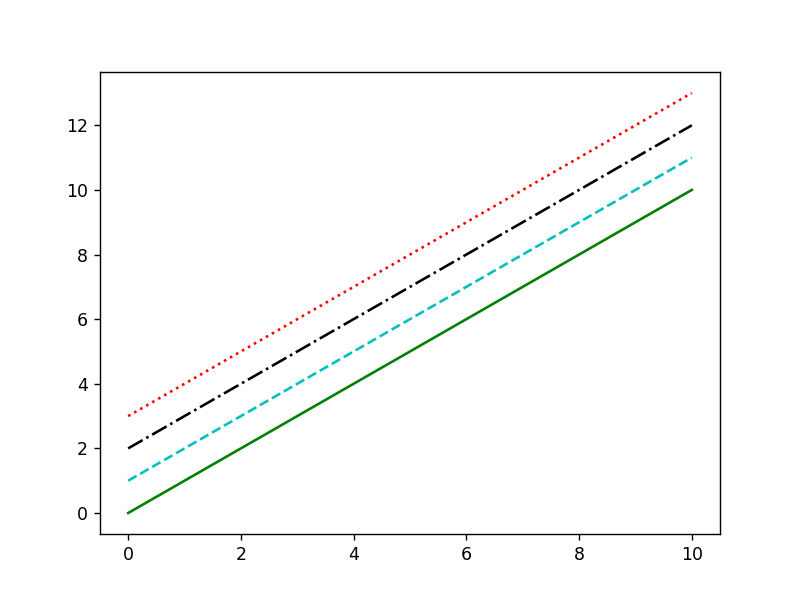

In [61]:
plt.figure()

plt.plot(x, x + 0, "g-")
plt.plot(x, x + 1, "c--")
plt.plot(x, x + 2, "k-.")
plt.plot(x, x + 3, ":r");

Ajustes del plot

<IPython.core.display.Javascript object>


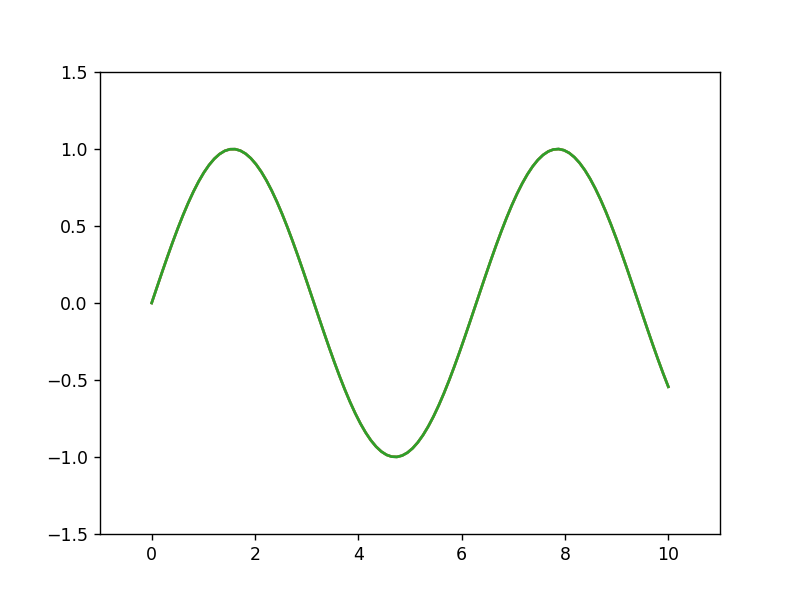

In [62]:
plt.figure()

plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

El método plt.axis() le permite establecer los límites x e y con una sola llamada, pasando una lista que especifica [xmin, xmax, ymin, ymax]

In [64]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

<IPython.core.display.Javascript object>


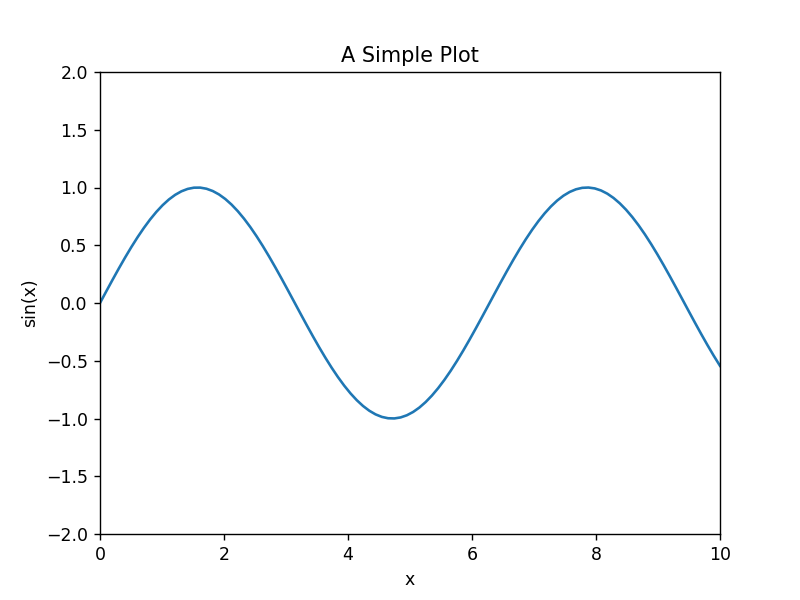

In [65]:
plt.figure()

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
xlabel="x", ylabel="sin(x)",
title="A Simple Plot");